You’re thinking: "If I can plot y = mx + c as a 2D line, then how do I plot multiple regression with more variables?"

Let’s break this down step by step, then I’ll give you Jupyter Notebook cells to visualize both simple and multiple regression, including gradient descent animation.
1. The Equation
Simple Linear Regression

One independent variable xx:
y=θ0+θ1x
y=θ0​+θ1​x

    This is a line in 2D (x-axis = independent variable, y-axis = dependent variable).

Multiple Linear Regression

For nn independent variables x1,x2,…,xnx1​,x2​,…,xn​:
y=θ0+θ1x1+θ2x2+⋯+θnxn
y=θ0​+θ1​x1​+θ2​x2​+⋯+θn​xn​

    This is not just a line — it’s a hyperplane in higher dimensions.

    If we have 2 independent variables (x1,x2x1​,x2​), the equation is:

y=θ0+θ1x1+θ2x2
y=θ0​+θ1​x1​+θ2​x2​

This can be visualized in 3D:

    x-axis → x1x1​

    y-axis → x2x2​

    z-axis → yy

2. Why Gradient Descent Is Hard to Plot in High Dimensions

    In simple regression (one slope parameter mm), we can draw the cost function J(θ) as a curve and see gradient descent as a point moving down the curve.

    In two parameters (θ0,θ1θ0​,θ1​), we can plot J as a 3D surface or contour plot.

    In multiple parameters (more than 2), we can’t directly plot J — we can only visualize 2D slices or use dimensionality reduction.

3. Visualizing Gradient Descent

We’ll do three levels:

    Simple regression: 2D data + cost function curve.

    Two features: 3D plane + gradient descent cost contours.

    Multiple features: Show cost reduction over iterations (line plot).

Simple Linear Regression with Gradient Descent

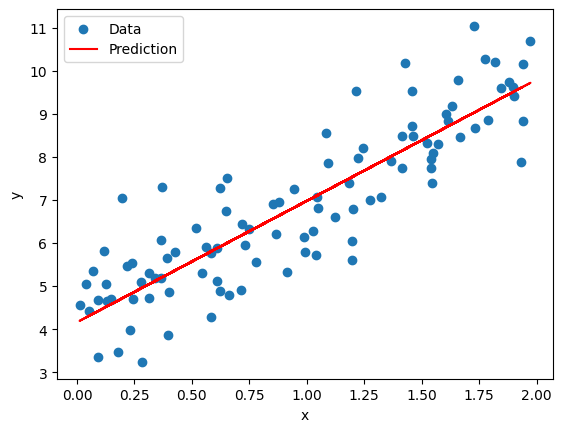

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (x0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent
eta = 0.1  # learning rate
n_iterations = 100
m = len(X_b)
theta = np.random.randn(2, 1)  # random init

theta_path = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path.append(theta.copy())

# Plot the regression line
plt.scatter(X, y, label="Data")
plt.plot(X, X_b.dot(theta), "r-", label="Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Multiple Linear Regression (2 Features) in 3D



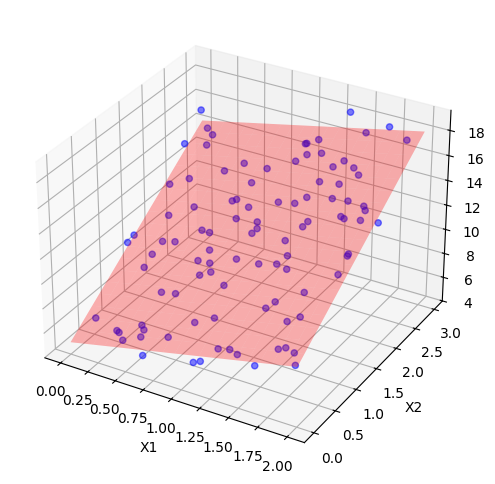

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic data
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 5 + 2 * X1 + 3 * X2 + np.random.randn(100, 1)

# Stack features + bias
X_b = np.c_[np.ones((100, 1)), X1, X2]

# Normal Equation (just for quick fit)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict for a grid
x1_grid, x2_grid = np.meshgrid(
    np.linspace(0, 2, 20),
    np.linspace(0, 3, 20)
)
X_grid = np.c_[np.ones((400, 1)), x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = X_grid.dot(theta_best).reshape(x1_grid.shape)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue', alpha=0.5)
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.3, color='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()


Gradient Descent Cost Plot (Multiple Features)

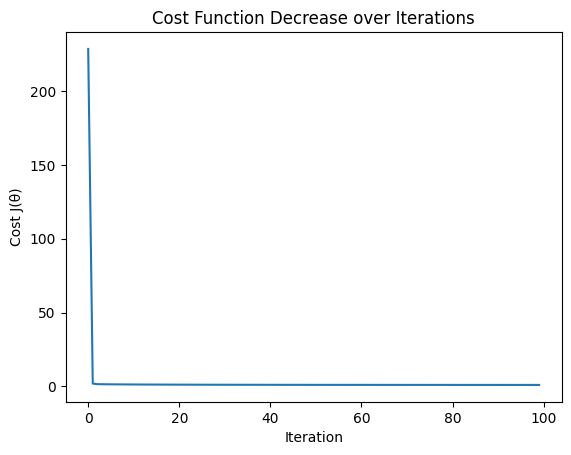

In [3]:
# Gradient Descent for multiple features
theta = np.random.randn(3, 1)
eta = 0.1
n_iterations = 100
m = len(X_b)
costs = []

for iteration in range(n_iterations):
    predictions = X_b.dot(theta)
    error = predictions - y
    cost = (1/m) * np.sum(error**2)
    costs.append(cost)
    gradients = 2/m * X_b.T.dot(error)
    theta = theta - eta * gradients

# Plot cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function Decrease over Iterations')
plt.show()
